In [146]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [147]:
from sklearn.svm import SVC
from sklearn import datasets

dateAndTime = "2018-11-14-17-51-05/";
filename = '/Users/roberto/data/RO-logging/'+dateAndTime+'sorted_eigenvectors.csv';
print('Reading from: ' + filename)
df1 = pd.read_csv(filename, names=range(1800))

#convert dataframe to matrix
eigenvecs = np.copy(df1.values)
[m,n] = shape(eigenvecs)

filename = '/Users/roberto/data/RO-logging/'+dateAndTime+'labels.csv';
print('Reading from: ' + filename)
df2 = pd.read_csv(filename, names=range(m))
labels = np.copy(df2.values)
labels = labels.T

Reading from: /Users/roberto/data/RO-logging/2018-11-14-17-51-05/sorted_eigenvectors.csv
Reading from: /Users/roberto/data/RO-logging/2018-11-14-17-51-05/labels.csv


In [148]:
a1 = [1,2,3,4,5,6]
b1 = [7,8,9,10,11,12]
rng_state = np.random.get_state()
np.random.shuffle(a1)
np.random.set_state(rng_state)
np.random.shuffle(b1)
print(a1)
print(b1)

[1, 2, 6, 3, 5, 4]
[7, 8, 12, 9, 11, 10]


In [157]:
rng_state = np.random.get_state()
np.random.shuffle(eigenvecs)
np.random.set_state(rng_state)
np.random.shuffle(labels)

split_index = 50

X_train = np.copy(eigenvecs[0:split_index,:])
y_train = np.copy(ravel(labels[0:split_index]))

X_test = np.copy(eigenvecs[split_index+1:m,:])
y_test = np.copy(ravel(labels[split_index+1:m]))

[m_train,n_train] = shape(X_train)
print("Size of training data is: \n",shape(X_train))

Size of training data is: 
 (50, 1800)


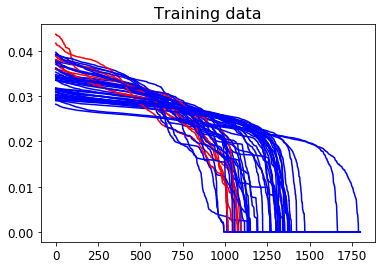

In [158]:
label_colours = []              
for i in range(m_train):
    if(labels[i] == 1):
        label_colours.append('red')
    else:
        label_colours.append('blue')

# plt.figure();
for i in range(m_train):
    plt.plot(X_train[i,:].T, color=label_colours[i]);
plt.title("Training data", fontsize=16);

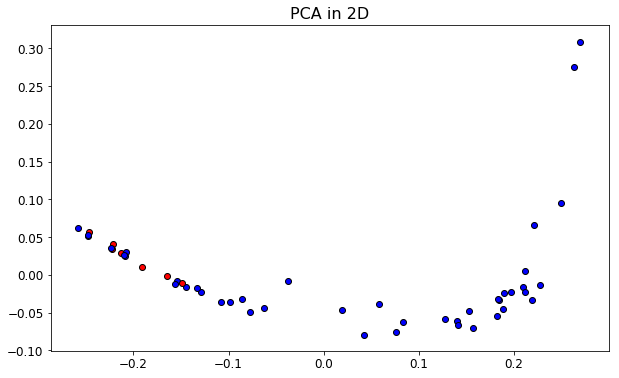

In [159]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

X = np.copy(eigenvecs[0:split_index,:])
y = np.copy(ravel(labels[0:split_index]))

[a,b] = shape(X)

fig = plt.figure(1, figsize=(10, 6))
plt.clf()

plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

for i in range(a):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=label_colours[i],
           edgecolor='k')
plt.title("PCA in 2D", fontsize=16)
plt.show()

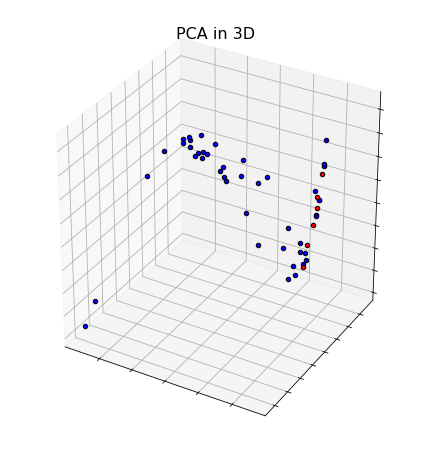

In [160]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

X = np.copy(eigenvecs[0:split_index,:])
y = np.copy(ravel(labels[0:split_index]))

[a,b] = shape(X)

fig = plt.figure(1, figsize=(6, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

for i in range(a):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=label_colours[i],
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.title("PCA in 3D", fontsize=16)
plt.show()

In [173]:
from sklearn.svm import SVC

X = np.copy(eigenvecs[0:split_index,:])
y = np.copy(ravel(labels[0:split_index]))

print(shape(X))
print(shape(y))

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float(75))
svm_clf.fit(X, y)

(50, 1800)
(50,)


SVC(C=75.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

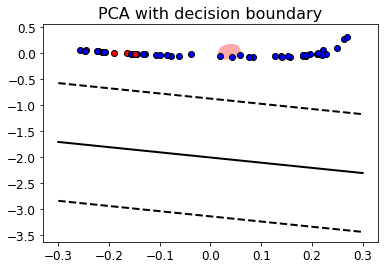

In [174]:
xlim1 = -0.3
xlim2 = 0.3
x0 = np.linspace(xlim1, xlim2, 200)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plot_svc_decision_boundary(svm_clf, xlim1, xlim2)
for i in range(split_index):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=label_colours[i],
           edgecolor='k')
plt.title("PCA with decision boundary", fontsize=16)
plt.show()


In [175]:
print(shape(X_test))
predictions = svm_clf.predict(X_test)
print(predictions)

(49, 1800)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0.5,1,'Predictions')

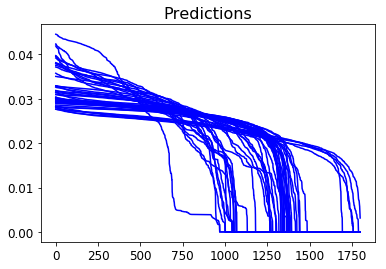

In [176]:
[a,b] = shape(X_test)
predict_colours = []                 
for i in range(a):
    if(predictions[i] == 1):
        predict_colours.append('red')
    else:
        predict_colours.append('blue')

# plt.figure();
# fix the indices here...
for i in range(a):
    plt.plot(X_test[i,:].T, color=predict_colours[i]);
plt.title("Predictions", fontsize=16)